In [7]:
import os
import random
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import geopandas as gpd
import rasterio
from src.visualization import show_city_nvdi
import treescope
import rasterio
import rasterio.features
import rasterio.mask
import rasterio.warp

In [8]:
def get_masked_image(image_path: str, polygon: gpd.GeoDataFrame):
    """
    Get a masked image based on a given image path and polygon.
    Parameters
    ----------
    image_path : str
        The path to the image file.
    polygon : shapely.geometry.Polygon
        The polygon used for masking.

    Returns
    -------
    numpy.ma.masked_array
        The masked image array.
    """
    with rasterio.open(image_path) as dataset:
        dataset_array = dataset.read(1)
        mask = rasterio.features.geometry_mask(
            [polygon], out_shape=dataset_array.shape, transform=dataset.transform, invert=False
        )
        masked_array = np.ma.masked_array(dataset_array, mask)
        masked_array = np.ma.masked_array(dataset_array, mask)
    return masked_array

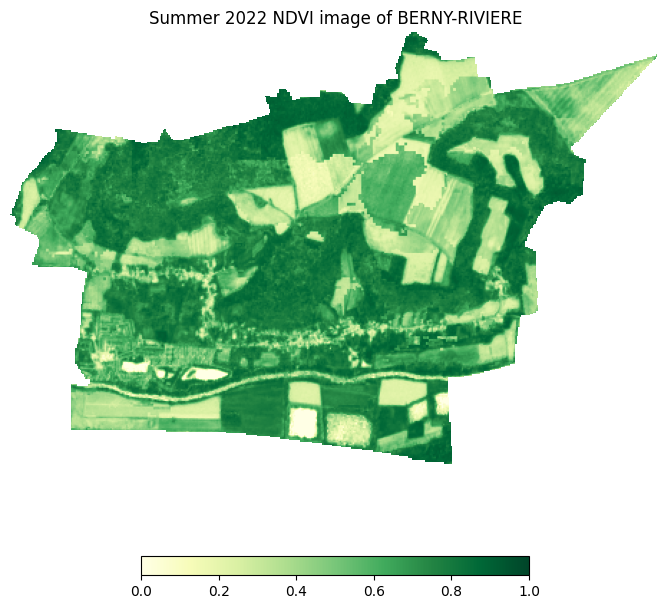

In [9]:
city_gdf = gpd.read_file("../datasets/villes_villages_fleuris.shp").to_crs(epsg=4326)
city_gdf.drop(columns=["gml_id"], inplace=True)
image_dir = "../datasets/ndvi_geotiff"
ndvi_gdf = city_gdf.copy()
ndvi_gdf["mean_ndvi"] = np.nan

for index, row in city_gdf.iterrows():
    polygon = row["geometry"]
    city_name = row["commune"].encode("latin-1").decode("utf-8")
    code_insee = row["code_insee"]

    image_path = f"../datasets/ndvi_geotiff/{code_insee}.tiff"

    masked_array = get_masked_image(image_path, polygon)
    show_city_nvdi(masked_array, city_name)
    break